<a href="https://colab.research.google.com/github/Federaffo/Data_Intensive_2022/blob/main/Depression_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importo le librerie

In [1]:
%matplotlib inline
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb

# Descrizione problema

Il dataset in esame, contiene informazioni utili per la previsione di assenza o presenza di depressione tra gli studenti

L'obiettivo del progetto è quello di predire una variabile discreta binaria.

In [2]:
student = pd.read_csv("students.csv",  index_col=0)

In [3]:
student.head()

,Timestamp,gender,age,course,year,grades,marital,depression,anxiety,panic_attack,specialist,sport,alchool
0,8/7/2020 17:46,Male,21.0,Finance,3.0,20.252930,False,False,True,False,False,True,False
1,8/7/2020 14:56,Female,18.0,Management Studies,2.0,29.959451,False,True,True,False,True,False,True
2,8/7/2020 16:21,Female,21.0,General Business and Management,2.0,25.429350,True,True,False,True,True,False,True
3,8/7/2020 14:31,Male,20.0,Accounting,2.0,19.425978,False,False,True,False,False,True,False
4,8/7/2020 17:50,Male,18.0,Computer Science,1.0,21.539774,False,False,True,False,False,True,False


Di seguito sono riportate le dimensioni in memoria, il numero di istanze non nulle e il tipo delle feature che compongono i dati raccolti nel dataset (training set) 

In [4]:
student.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     2000 non-null   object 
 1   gender        2000 non-null   object 
 2   age           2000 non-null   float64
 3   course        2000 non-null   object 
 4   year          2000 non-null   float64
 5   grades        2000 non-null   float64
 6   marital       2000 non-null   bool   
 7   depression    2000 non-null   bool   
 8   anxiety       2000 non-null   bool   
 9   panic_attack  2000 non-null   bool   
 10  specialist    2000 non-null   bool   
 11  sport         2000 non-null   bool   
 12  alchool       2000 non-null   bool   
dtypes: bool(7), float64(3), object(3)
memory usage: 474.6 KB


# Data Cleaning

Formatto i dati in modo da poter essere elaborati con maggiore facilità


Elimino inoltre la colonna TimeStamp in quanto riguarda la data di compilazione del questionario e non ha nessuna correlazione con i dati

In [5]:
# Gender:  0 => Female
# Gender:  1 => Male
student["gender"] = student['gender'].map({'Female': False, 'Male': True})

student.drop("Timestamp",axis = 1, inplace=True)



In [6]:
student.head()

,gender,age,course,year,grades,marital,depression,anxiety,panic_attack,specialist,sport,alchool
0,True,21.0,Finance,3.0,20.252930,False,False,True,False,False,True,False
1,False,18.0,Management Studies,2.0,29.959451,False,True,True,False,True,False,True
2,False,21.0,General Business and Management,2.0,25.429350,True,True,False,True,True,False,True
3,True,20.0,Accounting,2.0,19.425978,False,False,True,False,False,True,False
4,True,18.0,Computer Science,1.0,21.539774,False,False,True,False,False,True,False


### Significato delle feature

Dati di tipo categorico 
- **`gender`** Genere del soggetto in esame (True se maschio False se Femmina)

- **`age`** Età del soggetto

- **`course`** Il nome del corso di studio dello studente

- **`year`** Anno di studio corrente

- **`grades`** Media dei voti dello studente

- **`marital`** Indica se il soggetto è sposato oppure no

- **`depression`** indica la presenza o meno di depressione dello studente

- **`anxiety`** indica se il soggetto soffre di ansia

- **`panic_attack`** Indica se il soggetto soffre di attacchi di panico

- **`specialist`** indica se il soggetto è seguito da uno specialista (es. psicologo) 

- **`sport`** indica se il soggetto pratica sport regolarmente

- **`alchool`** indica se il soggetto fa uso regolarmente di alchol



Con il metodo _describe_ è possibile avere una rappresentazione statistica delle feature numeriche, ottenendo media, deviazione standard e la distribuzione in termini di massimi, minimi e percentili.


### Esplorazione singole feature

In [7]:
student.describe()

,age,year,grades
count,2000.00000,2000.000000,2000.000000
mean,20.77500,2.854500,24.071375
std,1.93604,1.307358,3.161989
min,18.00000,1.000000,18.000766
25%,19.00000,2.000000,21.612770
50%,21.00000,3.000000,24.168937
75%,22.00000,4.000000,26.609599
max,24.00000,5.000000,29.996210


I dati sono distribuiti abbastanza uniformemente, i voti, riguardando studenti universitari si muovono tra un minimo di 18 ed un massimo di 30.
Tra i dati non troviamo casi particolari che possano alterare l'elaborazione di un modello.


# Analisi dei dati

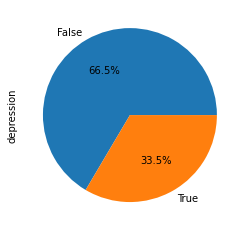

In [8]:
student['depression'].value_counts().plot.pie(autopct='%1.1f%%')

Circa il 70% degli studenti che fanno parte del Dataset non soffrono di depressione, questo potrebbe essere un problema nella fase di modellazione e valutazione del modello. 


In [9]:
student.isna().sum()

gender          0
age             0
course          0
year            0
grades          0
marital         0
depression      0
anxiety         0
panic_attack    0
specialist      0
sport           0
alchool         0
dtype: int64

Il dataset non contiene valori nulli

Text(0.5, 1.0, 'age Boxplot')

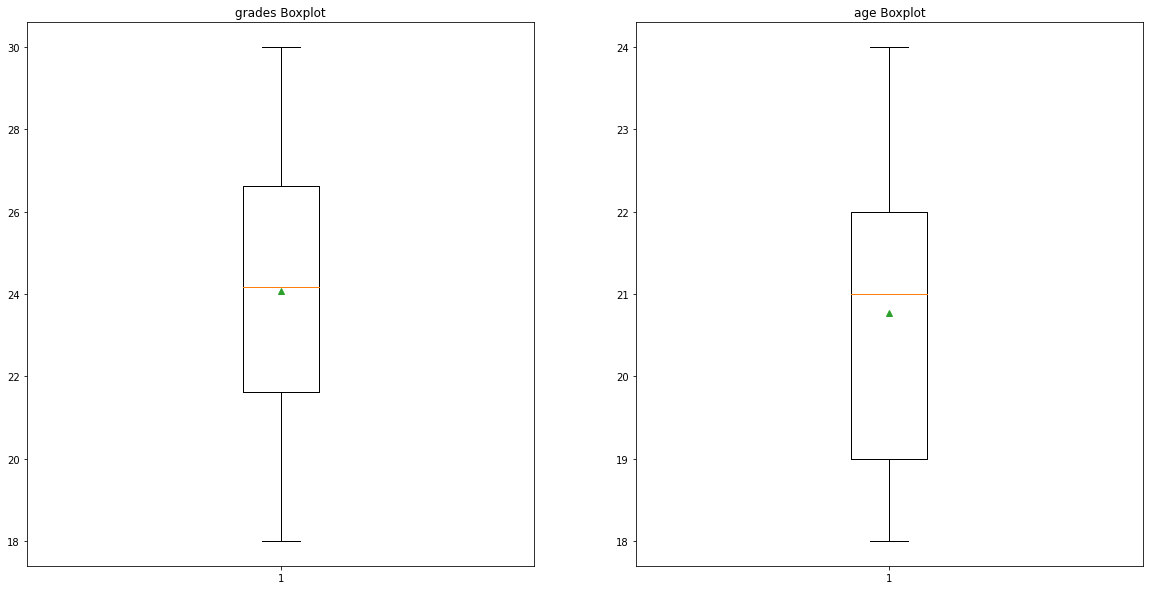

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20, 10))


axes[0].boxplot(student["grades"], showmeans=True)
axes[1].boxplot(student["age"], showmeans=True)
axes[0].set_title("grades Boxplot")
axes[1].set_title("age Boxplot")

Come abbiamo già  potuto constatare i dati sono distribuiti uniformemente, non ci sono eccezioni o elementi fuori dal range di valori accettabili

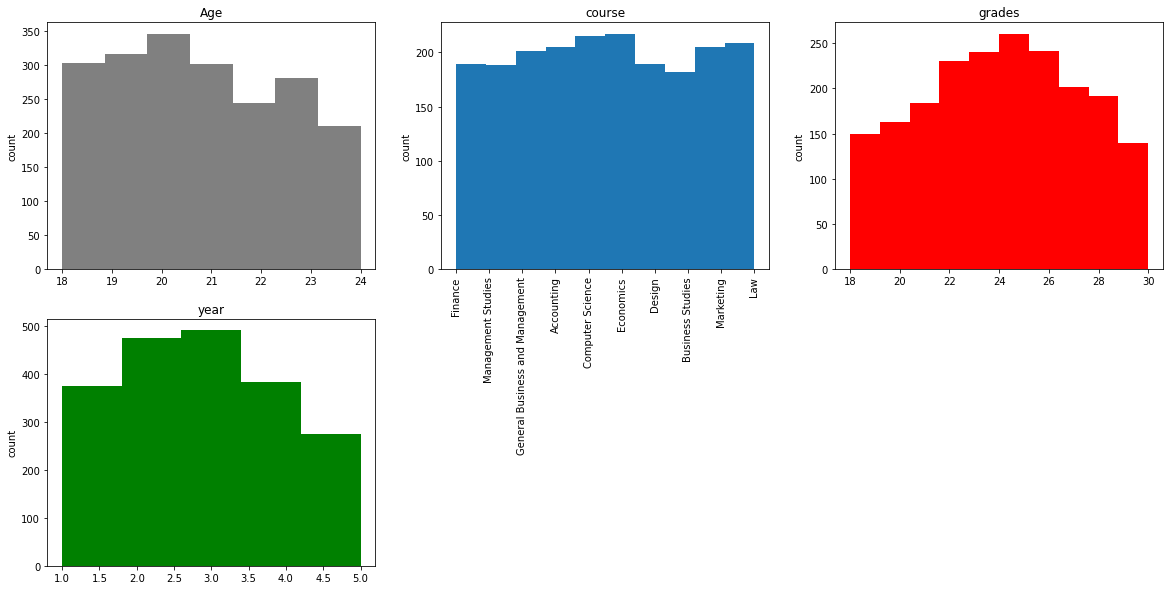

In [11]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('Age')
plt.hist(student['age'], label="age", color='gray', bins=7)
plt.ylabel('count')

plt.subplot(2, 3, 2)
plt.title('course')
plt.hist(student['course'], label="course")
plt.xticks(rotation=90)
plt.ylabel('count')

plt.subplot(2, 3, 3)
plt.title('grades')
plt.hist(student['grades'], label="grades", color="red")
plt.ylabel('count')

plt.subplot(2, 3, 4)
plt.title('year')
plt.hist(student['year'], label="year", color="green", bins=5)
plt.ylabel('count')


plt.show()

Text(0, 0.5, 'count')

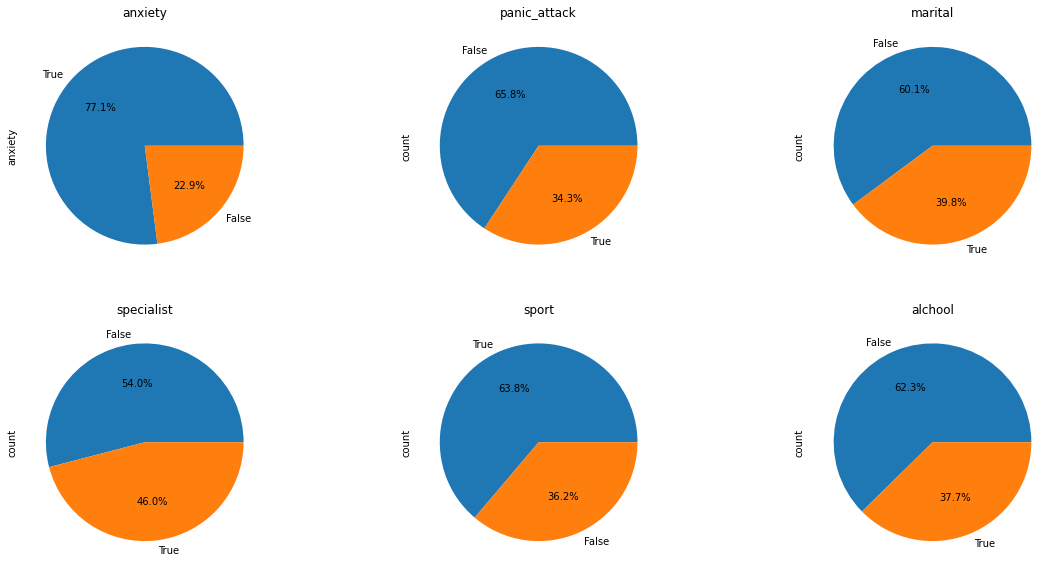

In [12]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('anxiety')
student['anxiety'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(2, 3, 2)
plt.title('panic_attack')
student['panic_attack'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('count')

plt.subplot(2, 3, 3)
plt.title('marital')
student['marital'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('count')

plt.subplot(2, 3, 4)
plt.title('specialist')
student['specialist'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('count')

plt.subplot(2, 3, 5)
plt.title('sport')
student['sport'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('count')

plt.subplot(2, 3, 6)
plt.title('alchool')
student['alchool'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('count')

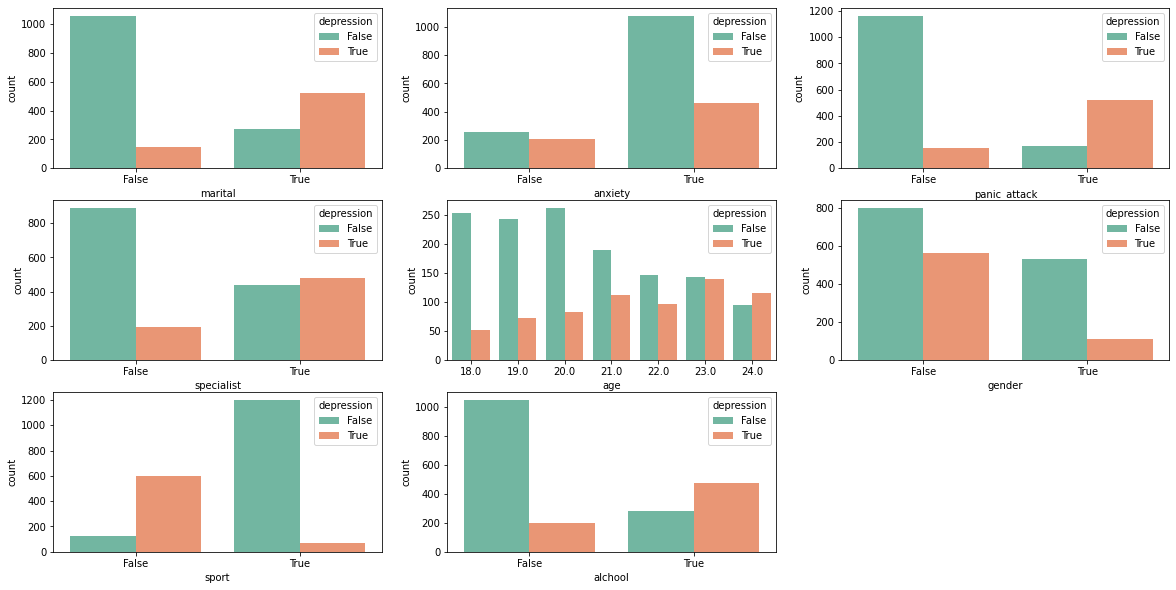

In [13]:
import seaborn as sns

from matplotlib import rcParams
plt.figure(figsize=(20, 10))
plt.subplot(3, 3, 1)
sns.countplot(x='marital', hue='depression', data = student, palette="Set2");
plt.subplot(3, 3, 2)
sns.countplot(x='anxiety', hue='depression', data = student, palette="Set2");
plt.subplot(3, 3, 3)
sns.countplot(x='panic_attack', hue='depression', data = student, palette="Set2");
plt.subplot(3, 3, 4)
sns.countplot(x='specialist', hue='depression', data = student, palette="Set2");
plt.subplot(3, 3, 5)
sns.countplot(x='age', hue='depression', data = student, palette="Set2");
plt.subplot(3, 3, 6)
sns.countplot(x='gender', hue='depression', data = student, palette="Set2");
plt.subplot(3, 3, 7)
sns.countplot(x='sport', hue='depression', data = student, palette="Set2");
plt.subplot(3, 3, 8)
sns.countplot(x='alchool', hue='depression', data = student, palette="Set2");

Dai grafici appena mostrati notiamo chiaramente che ci sono diverse correlazioni tra i dati e la presenza o meno di depressione.
Le feature che sembrano essere più correlate alla depressione sono  **`sport`** e **`marital`**.

Notiamo che tra tutti gli studenti chi fa sport ha una bassissima probabilità di soffrire di depressione.

Notiamo inoltre che ci sono più ragazze che soffrono di depressione di quanto siano i maschi.

Dal grafico centrale notiamo chiaramente che al crescere dell'età crescono anche i casi di depressione.

Infine si può osservare che chi fa uso regolarmente di alchol, chi soffre di attacchi di panico o di ansia e chi è seguito da uno specialista ha più probabilità di soffrire di depressione.


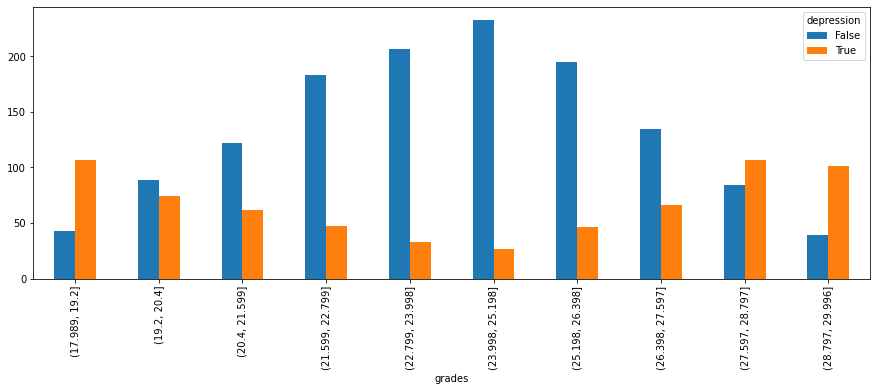

In [14]:
_ = student.groupby([pd.cut(student["grades"], bins=10), "depression"]).size().unstack("depression").plot.bar(stacked=False, figsize=(15,5))

Notiamo che c'è una forte correlazione tra la media dei voti di uno studente con la presenza di depressione.
Più ci muoviamo verso gli estremi e più i casi di depressione aumentano.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

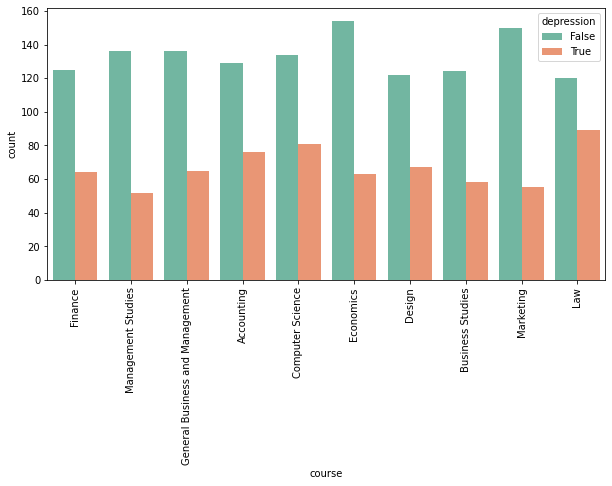

In [15]:
plt.figure(figsize=(10, 5))

sns.countplot(x='course', hue='depression', data = student, palette="Set2")
plt.xticks(rotation=90)

Il corso di studi dello studente non sembra influire significativamente sulla depressione se non leggermente per i corsi di legge.

In [16]:
def plot_correlation(dataset):
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Generate a mask for the upper triangle
    mask = np.zeros_like(dataset, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(dataset, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


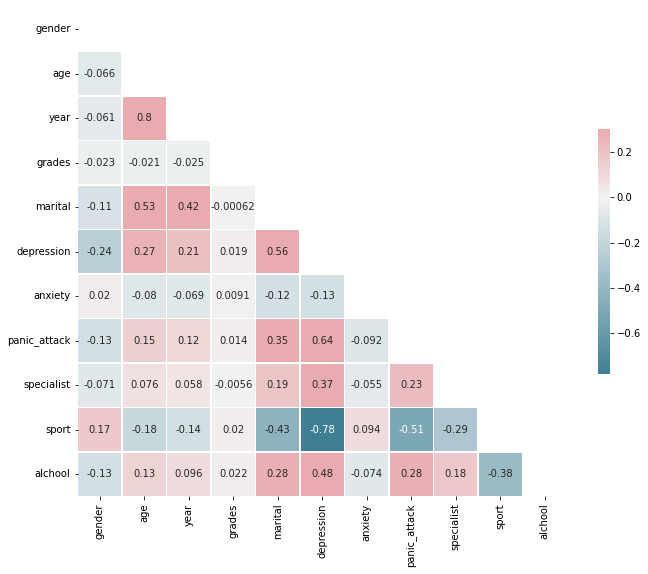

In [17]:
plot_correlation(student.corr())

Producendo una matrice di correlazione delle features, possiamo osservare le seguenti correlazioni rilevanti:  

* `sport` vs `depression`: è molto evidente come chi faccia sport abbia molta meno probabilità di soffrire di depressione, ciò ci conferma le analisi fatte poco fa.
* `alchool` vs `depression`: notiamo correlazione tra chi fa uso regolarmente di alchol e chi soffre di depressione, ciò si riflette inversamente sulla correlazione tra alchool e sport 
* `age` vs `year`: età e anno di corrente di studi sono fortemente correlati, come ci si poteva immaginare.
* `depression` vs `marited`: Come abbiamo notato con analisi precedenti, depression è fortemente correlato dal campo marital.
* `specialist` `panic_attack` `anxiety` conguentemente alle analisi fatte poco fa sono tutti più o meno correlati al campo depression 


Notiamo una inconguenza dall'analisi dei voti fatta poco fa dalla matrice di correlazione.
Ci si aspettava infatti una correlazione tra `grades` e `depression` che non viene però esplicitata dalla matrice.  
Questo potrebbe essere dovuto al fatto che la correlazione non è diretta, ma i casi di depressione aumentano sia nel caso in cui i voti siano sotto la media che quando i voti sono sopra la media, diminuendo quando grades è intorno alla media.
Non essendo una correlazione lineare la matrice di correlazione non evidenzia questa correlazione.

### Standardizzazione, regolarizzazione e multicollinearità

---



In [18]:
features = ['gender','age','year','grades','marital','anxiety','panic_attack','specialist','sport','alchool']
target = ['depression']

Convertiamo le variabili categoriche in numeriche.

Converiamo la colonna `Course` in più colonne, una per ogni corso esistente.



In [19]:
categorical_features = ['course']

In [20]:
dataset = pd.get_dummies(student, columns=categorical_features, prefix=categorical_features)

In [21]:
dataset.head()

,gender,age,year,grades,marital,depression,anxiety,panic_attack,specialist,sport,...,course_Accounting,course_Business Studies,course_Computer Science,course_Design,course_Economics,course_Finance,course_General Business and Management,course_Law,course_Management Studies,course_Marketing
0,True,21.0,3.0,20.252930,False,False,True,False,False,True,...,0,0,0,0,0,1,0,0,0,0
1,False,18.0,2.0,29.959451,False,True,True,False,True,False,...,0,0,0,0,0,0,0,0,1,0
2,False,21.0,2.0,25.429350,True,True,False,True,True,False,...,0,0,0,0,0,0,1,0,0,0
3,True,20.0,2.0,19.425978,False,False,True,False,False,True,...,1,0,0,0,0,0,0,0,0,0
4,True,18.0,1.0,21.539774,False,False,True,False,False,True,...,0,0,1,0,0,0,0,0,0,0


Si convertono ora le features categoriche splittando i loro valori nelle rispettive classi di appartenenza: `course` prevede 10 classi, ognuna per un corso di studi. 

Sarà presente un 1 solo in corrispondenza della classe di appartenenza e 0 negli altri casi. 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy import stats
import math

In [23]:
X = dataset.drop('depression', axis=1)
y = dataset['depression']

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=43, stratify=y.values)

Addestriamo un semplice modello per verificare quali sono le feature più importanti.

In [25]:


std_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  Perceptron())
])

std_model.fit(X_train,y_train)
print("R-squared coefficient: {:.5}".format(std_model.score(X_val, y_val)))


R-squared coefficient: 0.93667


In [26]:
pd.Series(std_model["model"].coef_[0], index=X_train.columns)

gender                                    -3.593228
age                                       -2.471399
year                                       0.935539
grades                                     4.885987
marital                                   10.614456
anxiety                                   -4.558651
panic_attack                               9.419883
specialist                                 4.045463
sport                                    -13.943321
alchool                                    7.859229
course_Accounting                         -2.144940
course_Business Studies                   -2.773398
course_Computer Science                    1.476347
course_Design                             -2.489068
course_Economics                           0.830342
course_Finance                             0.944120
course_General Business and Management    -2.333333
course_Law                                 1.136936
course_Management Studies                  4.194408
course_Marke

`Sport` e `Marital` sono le variabili che ancora una volta risultano più influenti per il modello.

# Parte 3 - Modellazione

Sono testati diversi modelli di classificazione. 

Tramite Grid Search e StratifiedKFold sono generati 5 modelli differenti in grado di stimare gli iperparametri e permettere il calcolo dell'accuratezza dei modelli studiati.

In alcune GridSearch sono stati volontariamente omessi alcuni valori di iperparametri che sono stati testati individualmente su altri notebook. Questa decisione è stata fatta per alleggerire i tempi di calcolo di questo notebook in modo da presentare solo risultati rilevanti.

In [27]:
from sklearn.model_selection import KFold, StratifiedKFold
skf = StratifiedKFold(3, shuffle=True, random_state=42)

## Perceptron


In [28]:
models = {}


from sklearn.model_selection import GridSearchCV
from sklearn import metrics

std_perceptron = Pipeline([
    ('std', None),
    ('perceptron', Perceptron(n_jobs=-1, early_stopping=True, n_iter_no_change=5))
])

parameters = [
    {
        "std": [None, StandardScaler()],
        "perceptron__penalty": ["l2", "l1"],
        'perceptron__alpha': [0.0001, 0.001, 0.01, 1, 10],
    },
    {
        "std": [None, StandardScaler()],
        "perceptron__penalty": ["none"]
    },
    {
        "std": [None, StandardScaler()],
        "perceptron__penalty": ["elasticnet"],
        'perceptron__alpha': [0.0001, 0.001, 0.01, 1, 10],
        'perceptron__l1_ratio':np.linspace(0,1,5)

    }
]

perceptron_cv = GridSearchCV(std_perceptron, parameters, cv=skf, n_jobs=-1, scoring='f1')
perceptron_cv.fit(X_train, y_train)

score = perceptron_cv.score(X_val, y_val)

print("Best cross validation score: {}\n".format(perceptron_cv.best_score_))
print("             Test set score: {}\n".format(score))
print("                Best params: {}\n".format(perceptron_cv.best_params_))

models["Perceptron"] = {"Model": perceptron_cv.best_estimator_, "Score": perceptron_cv.best_score_}



Best cross validation score: 0.9079157139182427

             Test set score: 0.8960396039603962

                Best params: {'perceptron__alpha': 0.0001, 'perceptron__l1_ratio': 0.5, 'perceptron__penalty': 'elasticnet', 'std': StandardScaler()}



In [29]:
pd.Series(perceptron_cv.best_estimator_[1].coef_[0], index=X_train.columns)

gender                                    -2.905432
age                                        0.732725
year                                       1.360329
grades                                    -4.468663
marital                                    8.044443
anxiety                                   -0.249342
panic_attack                              10.796813
specialist                                 4.634021
sport                                    -12.039631
alchool                                    6.035412
course_Accounting                         -2.053939
course_Business Studies                    0.000000
course_Computer Science                    3.151686
course_Design                              0.000000
course_Economics                          -2.668894
course_Finance                             6.585283
course_General Business and Management     0.000000
course_Law                                 0.000000
course_Management Studies                 -2.736769
course_Marke

In [30]:
pred = perceptron_cv.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       False       0.95      0.94      0.95       399
        True       0.89      0.90      0.90       201

    accuracy                           0.93       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.93      0.93      0.93       600



### Perceptron with Polynomial features

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly_perceptron = Pipeline([
    ('poly', PolynomialFeatures()),
    ('std', StandardScaler()),
    ('perceptron', Perceptron(n_jobs=-1,))
])


parameters = [
    {
        "std": [None, StandardScaler()],
        "perceptron__penalty": ["l2", "l1"],
        'perceptron__alpha': [0.0001, 0.001, 0.01, 1],
        'poly__degree': list(range(1,5))

    },
    {
        "std": [None, StandardScaler()],
        "perceptron__penalty": ["none"],
        'poly__degree': list(range(1,5))

    },
    {
        "std": [None, StandardScaler()],
        "perceptron__penalty": ["elasticnet"],
        'perceptron__alpha': [0.0001, 0.001, 0.01, 1],
        'perceptron__l1_ratio':[1,0.5,0.1],
        'poly__degree': list(range(1,5))


    }
]

poly_perceptron_cv = GridSearchCV(poly_perceptron, parameters, cv=skf, n_jobs=-1, return_train_score=True, scoring='f1')
poly_perceptron_cv.fit(X_train, y_train)

score = poly_perceptron_cv.score(X_val, y_val)

print("Best cross validation score: {}\n".format(poly_perceptron_cv.best_score_))
print("             Test set score: {}\n".format(score))
print("                Best params: {}\n".format(poly_perceptron_cv.best_params_))

models["Polynomial Perceptron"] = {"Model": poly_perceptron_cv.best_estimator_, "Score": poly_perceptron_cv.best_score_}


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best cross validation score: 0.9044047739699913

             Test set score: 0.9227053140096618

                Best params: {'perceptron__alpha': 0.0001, 'perceptron__l1_ratio': 0.5, 'perceptron__penalty': 'elasticnet', 'poly__degree': 4, 'std': None}



In [32]:
pred = poly_perceptron_cv.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       False       0.97      0.94      0.96       399
        True       0.90      0.95      0.92       201

    accuracy                           0.95       600
   macro avg       0.94      0.95      0.94       600
weighted avg       0.95      0.95      0.95       600



In [33]:
#poly_perceptron_cv.best_estimator_[2].coef_[0]


# Logistic Regression

Metodo per ottenere un piano di separazione non ottimale ma lineare. Si può decidere:
- Standardizzazione i dati sottraendo la media e scalando con la varianza
- Metodo di penalizzazione/regolarizzazione
- il valore di C, ovvero dell'inverso dell'intensità di regolarizzazione


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_lr = Pipeline([
    ('std', StandardScaler()),
    ('lr', LogisticRegression(solver="saga"))
])


parameters = [
    {
        "std": [None, StandardScaler()],
        "lr__penalty": ["none"]
    },
    {
        "std": [None, StandardScaler()],
        "lr__penalty": ["l2", "l1"],
        "lr__C": np.linspace(0.1, 0.4, 5),

    },
    {
        "std": [None, StandardScaler()],
        "lr__penalty": ["elasticnet"],
        "lr__C": np.linspace(0.1, 0.4, 5),
        "lr__l1_ratio":  [0.1,0.2,0.5,1],
    }
]



lr_gs = GridSearchCV(std_lr, parameters,cv=skf, n_jobs=-1, return_train_score=False, scoring='f1')
lr_gs.fit(X_train, y_train)


score = lr_gs.score(X_val, y_val)

print("Best cross validation score: {}\n".format(lr_gs.best_score_))
print("             Test set score: {}\n".format(score))
print("                Best params: {}\n".format(lr_gs.best_params_))

models["Logistic Regression"] = {"Model": lr_gs.best_estimator_, "Score": lr_gs.best_score_}


Best cross validation score: 0.930781184914608

             Test set score: 0.923469387755102

                Best params: {'lr__C': 0.17500000000000002, 'lr__penalty': 'l1', 'std': StandardScaler()}



In [35]:
pred = lr_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       False       0.95      0.97      0.96       399
        True       0.95      0.90      0.92       201

    accuracy                           0.95       600
   macro avg       0.95      0.94      0.94       600
weighted avg       0.95      0.95      0.95       600



In [36]:
pd.Series(lr_gs.best_estimator_[1].coef_[0], index=X_train.columns)

gender                                   -0.553024
age                                       0.000000
year                                      0.002008
grades                                    0.088334
marital                                   1.201913
anxiety                                  -0.194466
panic_attack                              1.392894
specialist                                0.588103
sport                                    -1.845944
alchool                                   0.857343
course_Accounting                        -0.002144
course_Business Studies                   0.000000
course_Computer Science                   0.021491
course_Design                             0.016712
course_Economics                          0.000000
course_Finance                            0.000000
course_General Business and Management    0.000000
course_Law                                0.000000
course_Management Studies                 0.000000
course_Marketing               

# RandomForest

In [37]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = Pipeline([
    ('std', StandardScaler()),
    ('rfc', RandomForestClassifier(n_jobs=-1, random_state=3))
])

parameters = {
    'rfc__n_estimators': [100, 200, 300],
    'rfc__max_depth': [2, 4, 6, 8, 10],
    'rfc__min_samples_leaf': [2,2,10],
    'rfc__min_samples_split': [2,10,20],
}
    

rfc_gs = GridSearchCV(rfc, parameters, cv=skf, n_jobs=-1, return_train_score=True, scoring='f1')
rfc_gs.fit(X_train, y_train)

score = rfc_gs.score(X_val, y_val)

print("Best cross validation score: {}\n".format(rfc_gs.best_score_))
print("             Test set score: {}\n".format(score))
print("                Best params: {}\n".format(rfc_gs.best_params_))

models["RandomForest"] = {"Model": rfc_gs.best_estimator_, "Score": rfc_gs.best_score_}


Best cross validation score: 0.9348175501775159

             Test set score: 0.9360613810741688

                Best params: {'rfc__max_depth': 8, 'rfc__min_samples_leaf': 2, 'rfc__min_samples_split': 2, 'rfc__n_estimators': 200}

CPU times: user 3.83 s, sys: 276 ms, total: 4.11 s
Wall time: 3min 14s


In [38]:
pred = rfc_gs.predict(X_val)

print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       False       0.96      0.98      0.97       399
        True       0.96      0.91      0.94       201

    accuracy                           0.96       600
   macro avg       0.96      0.95      0.95       600
weighted avg       0.96      0.96      0.96       600



In [39]:
pd.Series(rfc_gs.best_estimator_[1].feature_importances_, index=X_train.columns)

gender                                    0.018562
age                                       0.028588
year                                      0.016613
grades                                    0.076406
marital                                   0.143047
anxiety                                   0.007407
panic_attack                              0.206210
specialist                                0.042575
sport                                     0.347354
alchool                                   0.085294
course_Accounting                         0.002444
course_Business Studies                   0.002251
course_Computer Science                   0.003078
course_Design                             0.002694
course_Economics                          0.001805
course_Finance                            0.002370
course_General Business and Management    0.003414
course_Law                                0.003587
course_Management Studies                 0.002815
course_Marketing               

### Decision Tree

In [40]:
%%time

tree_model = Pipeline([
    ("scaler", StandardScaler()),
    ("tree", DecisionTreeClassifier(random_state=42))
])

#print(tree_model.get_params())

tree_grid = {"scaler": [None, StandardScaler()],
             'tree__max_depth': [i for i in range(2, 7)]
             }

tree_gs = GridSearchCV(tree_model, tree_grid, cv=skf, n_jobs=-1, return_train_score=True, scoring='f1')
tree_gs.fit(X_train, y_train)

score = tree_gs.score(X_val, y_val)

print("Best cross validation score: {}\n".format(tree_gs.best_score_))
print("             Test set score: {}\n".format(score))
print("                Best params: {}\n".format(tree_gs.best_params_))


models["Decision Tree"] = {"Model": tree_gs.best_estimator_, "Score": tree_gs.best_score_}


Best cross validation score: 0.9087426926001195

             Test set score: 0.9090909090909091

                Best params: {'scaler': None, 'tree__max_depth': 4}

CPU times: user 108 ms, sys: 2.4 ms, total: 110 ms
Wall time: 477 ms


In [41]:
pred = tree_gs.predict(X_val)

print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       False       0.95      0.96      0.96       399
        True       0.92      0.90      0.91       201

    accuracy                           0.94       600
   macro avg       0.94      0.93      0.93       600
weighted avg       0.94      0.94      0.94       600



In [42]:
pd.Series(tree_gs.best_estimator_[1].feature_importances_, index=X_train.columns)

gender                                    0.000000
age                                       0.000000
year                                      0.000000
grades                                    0.020787
marital                                   0.103975
anxiety                                   0.000000
panic_attack                              0.101136
specialist                                0.000000
sport                                     0.737182
alchool                                   0.036804
course_Accounting                         0.000000
course_Business Studies                   0.000000
course_Computer Science                   0.000000
course_Design                             0.000000
course_Economics                          0.000000
course_Finance                            0.000117
course_General Business and Management    0.000000
course_Law                                0.000000
course_Management Studies                 0.000000
course_Marketing               

# Riepilogo dll'accuratezza ottenuta

In [43]:
for name, model in models.items():
    print(name + ":\n\t\t\t\t{}".format(model["Score"]))

Perceptron:
				0.9079157139182427
Polynomial Perceptron:
				0.9044047739699913
Logistic Regression:
				0.930781184914608
RandomForest:
				0.9348175501775159
Decision Tree:
				0.9087426926001195


# Parte 4 - Valutazione dei modelli di classificazione

L'accuratezza non è una buona stima della capacità predittiva di un modello di classificazione, in particolare nei casi in cui il dataset è sbilanciato, perchè contiene maggiori record appartenenti ad una classe. In questo caso se si costruisse un modello che predica sempre l'assenza di depressione, esso avrebbe una accuratezza di circa il 70%

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

### Precision, Recall e F1-Score

Si costruisce una **matrice di confusione** per ciascun modello creato in precedenza, calcolando la **precisione**, la **recall** e la **F1-score**.
Il Perceptron ottiene nuovamente lo score peggiore mentre RandomForest ottiene lo score più alto di tutti

Calcoliamo i vari valori di score con un dataset che non è stato usato per il training dei modelli per verificare la generalità di essi.

In [45]:
def calculate_precision_recall_f1(name, X, y) :
    model = models[name]
    y_pred = model["Model"].predict(X)
    
    model["Precision"] = precision_score(y, y_pred)
    model["Recall"] = recall_score(y, y_pred)
    model["F1_Score"] = f1_score(y, y_pred, average="macro")
    
    print("{}:\n\n \
    Confusion matrix:\n{}\n\n \
           Precision: {}\n \
              Recall: {}\n \
    F1 Score (macro): {}\n\n\n".format(name, 
                                 pd.DataFrame(confusion_matrix(y, y_pred), index=classes, columns=classes), 
                                 model["Precision"], 
                                 model["Recall"], 
                                 model["F1_Score"]))

In [46]:
classes = ["not depressed" , "depressed"]
for name, model in models.items():
    calculate_precision_recall_f1(name, X_val, y_val)

Perceptron:

     Confusion matrix:
               not depressed  depressed
not depressed            377         22
depressed                 20        181

            Precision: 0.8916256157635468
               Recall: 0.900497512437811
     F1 Score (macro): 0.9216378924324593



Polynomial Perceptron:

     Confusion matrix:
               not depressed  depressed
not depressed            377         22
depressed                 10        191

            Precision: 0.8967136150234741
               Recall: 0.9502487562189055
     F1 Score (macro): 0.9409964229081388



Logistic Regression:

     Confusion matrix:
               not depressed  depressed
not depressed            389         10
depressed                 20        181

            Precision: 0.9476439790575916
               Recall: 0.900497512437811
     F1 Score (macro): 0.9431703374419074



RandomForest:

     Confusion matrix:
               not depressed  depressed
not depressed            392          7
depres

### Confronto modelli con intervallo di confidenza

Si verifica con **confidenza** al 95% se la F1-Score dei modelli è statisticamente significativa una dall'altra. 



In [62]:
def difference_between_two_models(error1, error2, confidence):
    z_half_alfa = stats.norm.ppf(confidence)
    variance = (((1 - error1) * error1) / len(y_val)) + (((1 - error2) * error2) / len(y_val))
    d_minus = abs(error1 - error2) - z_half_alfa * (pow(variance, 0.5))
    d_plus = abs(error1 - error2) + z_half_alfa * (pow(variance, 0.5))
    print("Valore minimo: {}\nValore massimo: {}\n".format(d_minus, d_plus))

lre_error = 1 - models["Logistic Regression"]["F1_Score"]
tree_error = 1 - models["Decision Tree"]["F1_Score"]
forest_error = 1 - models["RandomForest"]["F1_Score"]
poly_per = 1 - models["Polynomial Perceptron"]["F1_Score"]

print("RandomForest vs Logistic Regression , intervallo di confidenza:")
difference_between_two_models(forest_error, lre_error, 0.95)

print("RandomForest vs Decision Tree , intervallo di confidenza:")
difference_between_two_models(forest_error, tree_error, 0.95)

print("RandomForest vs Polynomial Perceptron , intervallo di confidenza:")
difference_between_two_models(forest_error, poly_per, 0.95)



RandomForest vs Logistic Regression , intervallo di confidenza:
Valore minimo: -0.011694986957135205
Valore massimo: 0.03051334456899733

RandomForest vs Decision Tree , intervallo di confidenza:
Valore minimo: -0.0016879346813130705
Valore massimo: 0.042532177489065744

RandomForest vs Polynomial Perceptron , intervallo di confidenza:
Valore minimo: -0.009725426890605387
Valore massimo: 0.03289161357000468



Riepilogo F1-Score

In [48]:
for name, model in models.items():
    print(name + ":\n\t\t\t\t{}".format(model["F1_Score"]))

Perceptron:
				0.9216378924324593
Polynomial Perceptron:
				0.9409964229081388
Logistic Regression:
				0.9431703374419074
RandomForest:
				0.9525795162478384
Decision Tree:
				0.9321573948439621


Il modello che ha ottenuto il risultato migliore è Random Forest.
Con score leggermente minore troviamo Logistic Regression e Polynomial perceptron 


## Parte 5 - Analisi del modello migliore

In [49]:
from sklearn.dummy import DummyClassifier

### Confronto con modello casuale

Viene creato un modello casuale

In [50]:
random = DummyClassifier(strategy="uniform", random_state=42)
random.fit(X_train, y_train)

random_score = random.score(X_val, y_val)
models["Dummy"] = {"Model" : random, "Score": random_score}
random_score

0.475

Ovviamente tutti i modelli scelti precedentemente sono statisticamente migliori di uno casuale, di seguito sono riportati gli intervalli di confidenza

In [54]:
calculate_precision_recall_f1("Dummy", X_val, y_val)

difference_between_two_models(1 - models["RandomForest"]["F1_Score"], 1 - models["Dummy"]["F1_Score"], 0.99)

difference_between_two_models(1 - models["Logistic Regression"]["F1_Score"], 1 - models["Dummy"]["F1_Score"], 0.99)

difference_between_two_models(1 - models["Polynomial Perceptron"]["F1_Score"], 1 - models["Dummy"]["F1_Score"], 0.99)

difference_between_two_models(1 - models["Perceptron"]["F1_Score"], 1 - models["Dummy"]["F1_Score"], 0.99)

difference_between_two_models(1 - models["Decision Tree"]["F1_Score"], 1 - models["Dummy"]["F1_Score"], 0.99)



Dummy:

     Confusion matrix:
               not depressed  depressed
not depressed            186        213
depressed                102         99

            Precision: 0.3173076923076923
               Recall: 0.4925373134328358
     F1 Score (macro): 0.46372481421895345



Valore minimo: 0.43737141886100317
Valore massimo: 0.5403379851967669

Valore minimo: 0.42722914683522983
Valore massimo: 0.5316618996106781

Valore minimo: 0.42488948393590104
Valore massimo: 0.5296537334424697

Valore minimo: 0.4041124087357935
Valore massimo: 0.5117137476912182

Valore minimo: 0.4153901403319104
Valore massimo: 0.521475020918107



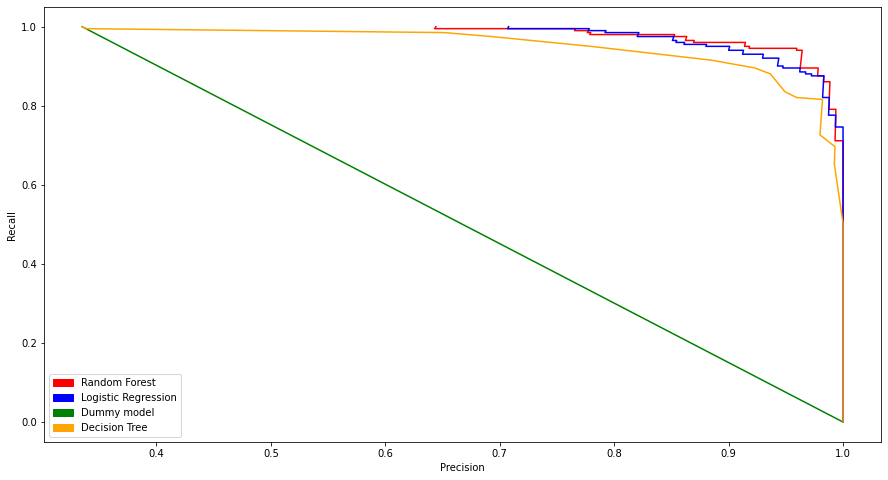

In [60]:
from sklearn.metrics import precision_recall_curve

fig = plt.figure(figsize=(15, 8))

red_patch = mpatches.Patch(color='red', label='Random Forest')
blue_patch = mpatches.Patch(color='blue', label='Logistic Regression')
green_patch = mpatches.Patch(color='green', label='Dummy model')
orange_patch = mpatches.Patch(color='orange', label='Decision Tree')


plt.legend(handles=[red_patch, blue_patch,green_patch,orange_patch])

precision_rf, recall_rf, tresholds_rf = precision_recall_curve(y_val, 
    models["RandomForest"]["Model"].predict_proba(X_val)[:, 1])

_ = plt.plot(precision_rf, recall_rf, color="red")

precision_knn, recall_knn, tresholds_knn = precision_recall_curve(y_val, 
    models["Logistic Regression"]["Model"].predict_proba(X_val)[:, 1])

_ = plt.plot(precision_knn, recall_knn, color="blue")


precision_knn, recall_knn, tresholds_knn = precision_recall_curve(y_val, 
    models["Dummy"]["Model"].predict_proba(X_val)[:, 1])

_ = plt.plot(precision_knn, recall_knn, color="green")


precision_knn, recall_knn, tresholds_knn = precision_recall_curve(y_val, 
    models["Decision Tree"]["Model"].predict_proba(X_val)[:, 1])

_ = plt.plot(precision_knn, recall_knn, color="orange")



_ = plt.xlabel("Precision")
_ = plt.ylabel("Recall")

Maggiore è l'area sotto la curva migliore è il modello, è evidente come RandomForest sia leggermente superiore a tutti gli altri modelli provati

A seguito di queste considerazioni, è stato scelto il modello basato su RandomForest

In [53]:
calculate_precision_recall_f1("RandomForest", X_val, y_val)


RandomForest:

     Confusion matrix:
               not depressed  depressed
not depressed            392          7
depressed                 18        183

            Precision: 0.9631578947368421
               Recall: 0.9104477611940298
     F1 Score (macro): 0.9525795162478384



